In [93]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [94]:
path = r'C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\normals\normcomp'
os.chdir(path)

csv = r'C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\normals\normcomp\AKR02_normComp.csv'

df = pd.read_csv(csv)
df.columns.values[0] = 'drop_me'
df = df.drop('drop_me',axis=1)
df

,julian_day,CoAg_tmean,COOP_tmean,CoAg_tmax,COOP_tmax,CoAg_tmin,COOP_tmin
0,1,14.04,23.29,30.08,36.41,5.09,10.85
1,2,22.85,24.23,44.08,35.93,15.97,12.08
2,3,25.07,26.79,44.18,39.63,17.00,13.85
3,4,24.64,26.17,38.31,38.93,11.98,13.41
4,5,26.33,24.31,40.20,37.59,11.65,11.50
5,6,28.32,24.74,38.61,38.56,8.35,10.93
6,7,27.41,24.74,39.86,37.70,13.03,11.78
7,8,30.54,28.41,42.09,41.74,16.07,15.07
8,9,31.42,30.78,40.67,44.30,15.26,17.26
9,10,33.04,29.89,42.44,41.85,17.27,17.93


In [95]:
def lob (x, a, b,c,d,f,g):
    return (a*x**5) + (b*x**4) + (c*x**3) + (d*x**2) + (f*x) + g 

In [96]:
n = len(df['julian_day'])
y = np.empty(n)

In [97]:
t = df['julian_day'].values
temp = df['CoAg_tmean'].values
c, cov = curve_fit(lob,t,temp)
print(c)

[ 1.70945553e-10 -1.29442438e-07  2.81137951e-05 -1.77106284e-03
  1.65670309e-01  2.66328520e+01]


In [98]:
n = len(df['julian_day'])
y = np.empty(n)
for i in range(n):
    y[i] = lob(df['julian_day'][i],c[0],c[1],c[2],c[3],c[4],c[5])
    
df['julian_day']

0        1
1        2
2        3
3        4
4        5
      ... 
361    362
362    363
363    364
364    365
365    366
Name: julian_day, Length: 366, dtype: int64

In [99]:
j_day = df['julian_day']
j_day = j_day.reset_index()
series = pd.Series(y)
df2 = series.reset_index()
df2
norms = df2.merge(j_day)
norms.columns.values[1] = 'tmean_normal'
norms.set_index(norms.julian_day)
#norms = norms.drop('index',axis=1)
#norms = norms[['julian_day','tmean_normal']]
norms

,index,tmean_normal,julian_day
0,0,26.796779,1
1,1,26.957331,2
2,2,27.114672,3
3,3,27.268963,4
4,4,27.420361,5
5,5,27.569022,6
6,6,27.715097,7
7,7,27.858736,8
8,8,28.000084,9
9,9,28.139285,10


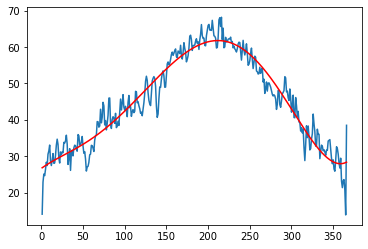

In [100]:
plt.plot(df['julian_day'],df['CoAg_tmean'])
plt.plot(df['julian_day'],y,'r')
plt.savefig(path + '/lobf_test.png')
plt.show()


In [102]:
score = r2_score(df['CoAg_tmean'],y)
score

0.9287461010462257